In [ ]:
FATIH RAKA KSATRIA
215150300111011

Klasifikasi Gesture Tangan dengan CNN

Epoch 1/50, Train Loss: 1.1003, Val Loss: 1.0986, Train Acc: 33.33%, Val Acc: 33.33%
Epoch 2/50, Train Loss: 1.0973, Val Loss: 1.0958, Train Acc: 33.33%, Val Acc: 33.33%
Epoch 3/50, Train Loss: 1.0944, Val Loss: 1.0930, Train Acc: 33.33%, Val Acc: 33.33%
Epoch 4/50, Train Loss: 1.0910, Val Loss: 1.0888, Train Acc: 33.33%, Val Acc: 33.33%
Epoch 5/50, Train Loss: 1.0852, Val Loss: 1.0814, Train Acc: 33.33%, Val Acc: 33.33%
Epoch 6/50, Train Loss: 1.0765, Val Loss: 1.0723, Train Acc: 36.11%, Val Acc: 38.83%
Epoch 7/50, Train Loss: 1.0646, Val Loss: 1.0580, Train Acc: 49.33%, Val Acc: 51.17%
Epoch 8/50, Train Loss: 1.0456, Val Loss: 1.0352, Train Acc: 50.78%, Val Acc: 51.17%
Epoch 9/50, Train Loss: 1.0149, Val Loss: 0.9976, Train Acc: 50.56%, Val Acc: 55.50%
Epoch 10/50, Train Loss: 0.9619, Val Loss: 0.9335, Train Acc: 56.56%, Val Acc: 59.83%
Epoch 11/50, Train Loss: 0.8624, Val Loss: 0.8007, Train Acc: 69.67%, Val Acc: 82.67%
Epoch 12/50, Train Loss: 0.6961, Val Loss: 0.6128, Train Acc: 7

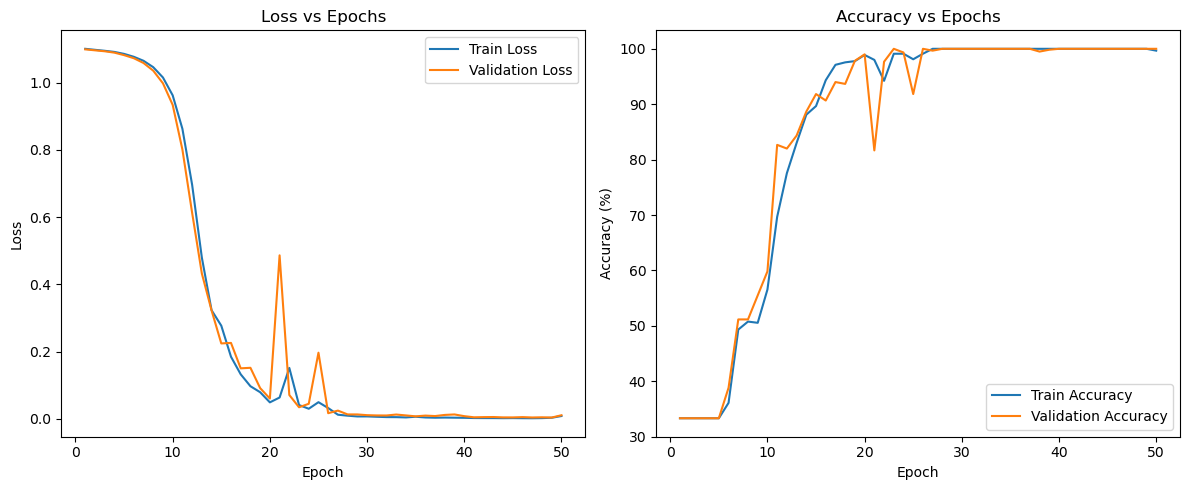

In [11]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pandas as pd
from time import time

# Transformasi untuk dataset
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Model neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 5)
        self.conv2 = nn.Conv2d(10, 16, 3)
        self.pool = nn.AdaptiveAvgPool2d((6, 6))
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = self.pool(x)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Data preparation
path_to_dataset = "datasets"
train_data = datasets.ImageFolder(root=f"{path_to_dataset}/train", transform=transform)
val_data = datasets.ImageFolder(root=f"{path_to_dataset}/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=20, shuffle=True)
val_loader = DataLoader(val_data, batch_size=20, shuffle=False)

# Model, loss, optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Training and validation
num_epochs = 50
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

time_start = time()

for epoch in range(num_epochs):
    # Training phase
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation phase
    net.eval()
    running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%")

# Save the model
torch.save(net, 'handfinal.pt')

time_end = time()
print(f"Training completed in {time_end - time_start:.2f} seconds")

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


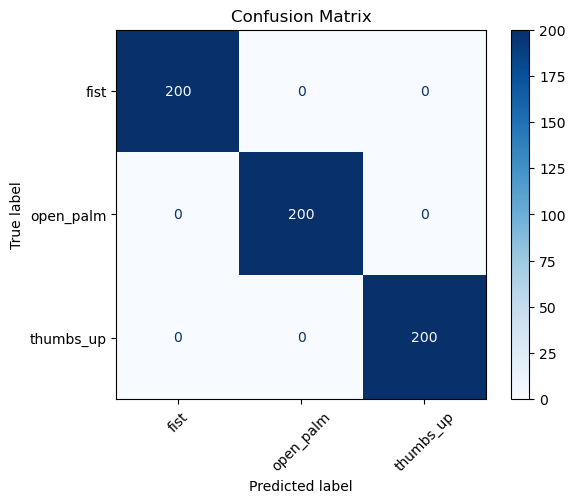

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Inference untuk dataset validasi
all_labels = []
all_predictions = []

net.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Membuat confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
class_names = val_data.classes  # Mendapatkan nama kelas dari dataset

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


In [15]:
from sklearn.metrics import classification_report

# Menghitung precision, recall, dan F1-score
report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

        fist       1.00      1.00      1.00       200
   open_palm       1.00      1.00      1.00       200
   thumbs_up       1.00      1.00      1.00       200

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

